In [ ]:
import pandas as pd
dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID","TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
nissing = dataframe.isna().sum()
print(nissing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
dataframe.fillna(dataframe.median(), inplace=True)
nissing = dataframe.isna().sum()
print(nissing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init = 10, max_iter = 300)
y_pread = kmeans.fit_predict(values)
print(y_pread)

[1 3 1 ... 1 1 2]


In [ ]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)


0.36454259456819194


In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0761660873408903


In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.794224707802


In [ ]:
def clustering_algoruthm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, kmeans.labels_, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1= clustering_algoruthm(3,values)
print(s1, dbs, calinski)

0.3272203126696238 1.0761660873408903 3431.794224707802


In [ ]:
s2, dbs2, calinski2 = clustering_algoruthm(5,values)
print(s2, dbs2, calinski2)

0.36454314826693845 1.075812734747931 3431.800540734652


In [ ]:
s3, dbs3, calinski3= clustering_algoruthm(50,values)
print(s3, dbs3, calinski3)

0.255232933674388 1.2349720697003486 1616.208988545371


In [ ]:
dataframe.count()


,0
BALANCE,8950
BALANCE_FREQUENCY,8950
PURCHASES,8950
ONEOFF_PURCHASES,8950
INSTALLMENTS_PURCHASES,8950
CASH_ADVANCE,8950
PURCHASES_FREQUENCY,8950
ONEOFF_PURCHASES_FREQUENCY,8950
PURCHASES_INSTALLMENTS_FREQUENCY,8950
CASH_ADVANCE_FREQUENCY,8950


In [ ]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algoruthm(5, random_data)
print(s,dbs,calinski)
print(s2, dbs2, calinski2)

0.03984585142450721 3.5160022210088124 302.1853656860816
0.36454314826693845 1.075812734747931 3431.800540734652


In [ ]:
set1, set2, set3 = np.array_split(values,3)
s1, dbs1, calinski1 = clustering_algoruthm(5, set1)
s2, dbs2, calinski2 = clustering_algoruthm(5, set2)
s3, dbs3, calinski3 = clustering_algoruthm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36874828236865986 1.0591408006918441 1204.05579455549
0.35406999696241026 1.1389554530299946 1194.945411949724
0.36704188760608253 1.0984932613776763 1167.5309516804


<function matplotlib.pyplot.show(close=None, block=None)>

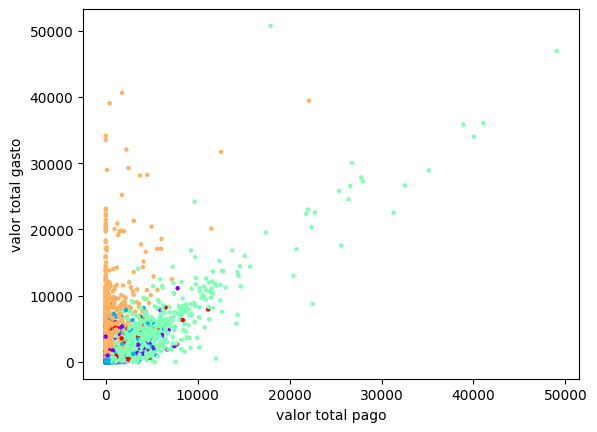

In [ ]:
 import matplotlib.pyplot as plt
 plt.scatter(dataframe["PURCHASES"], dataframe["PAYMENTS"], c=labels, s=5, cmap='rainbow')
 plt.xlabel("valor total pago")
 plt.ylabel("valor total gasto")
 plt.show

KeyboardInterrupt: 

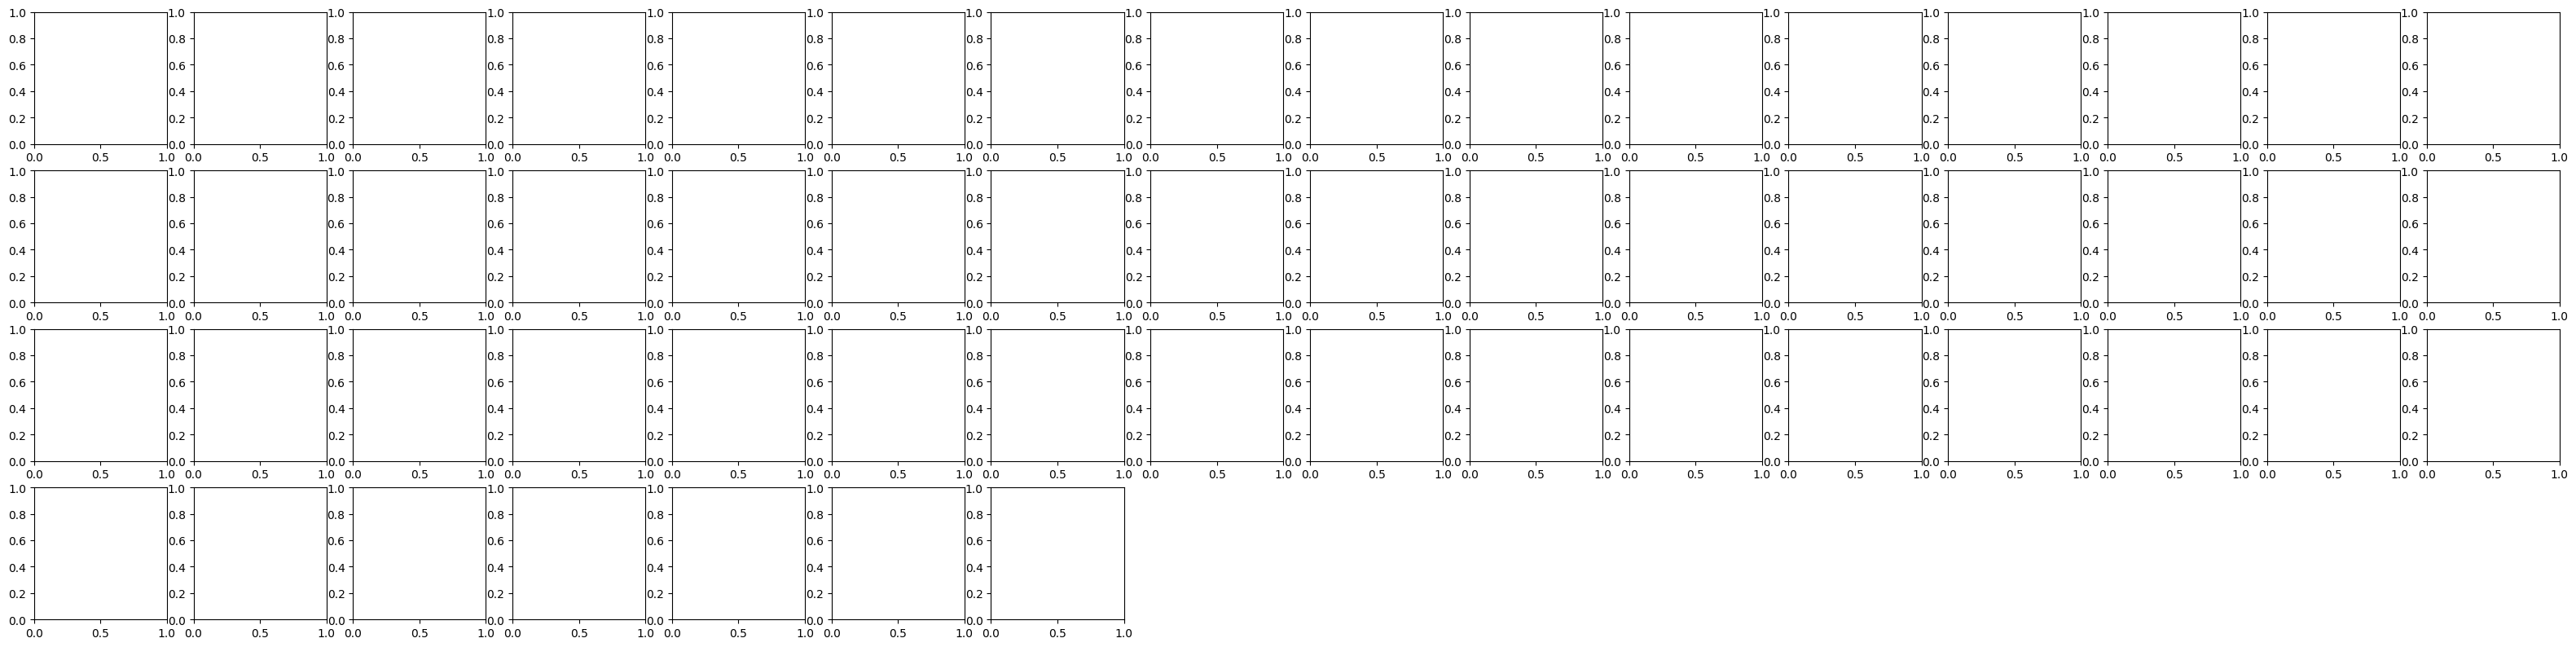

In [ ]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe, hue="cluster")
plt.show()

In [ ]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        1535.0  1142.229612  1665.393296   0.000000   212.073923   
3        1075.0  1794.243689  1980.861978   0.000000   507.620537   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2         553.534453  1370.143507  19043.138560            1535.0  0.928174   
3        1088.056301  2310.842870  14581.459140            1075.0  0.862516   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.593643   8345.641905           2649.0  0.001799   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...       524.475206  18621.013310           1535.0  0.278458   
3        ...       883.800031  21235.065300           1075.0  0.117289   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023260  0.0  0.0  0.000000  0.000000  0.6  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.367223  0.0  0.0  0.083333  0.545455  1.0  
3        0.186635  0.0  0.0  0.083333  0.142857  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [6.90675111e-02 2.30705557e-04 1.21658954e-01 4.81850033e-02
  7.35754955e-02 2.43088317e-02 1.72783234e-04 3.37159992e-05
  1.40202473e-04 7.91617727e-06 1.23849032e-04 2.86300388e-03
  9.43470406e-01 1.53965013e-01 5.68346671e-02 7.61514100e-05]
 [1.60248876e-01 2.45667436e-04 4.39078766e-01 2.57087092e-01
  1.82160953e-01 2.54240766e-02 2.04750755e-04 8.90356905e-05
  1.51033916e-04 9.37512832e-06 1.69484351e-04 6.18619148e-03
  6.03148934e-01 4.02693425e-01 8.55969101e-02 7.20212901e-05]
 [2.34955101e-01 2.16241674e-04 6.09376425e-02 3.48207303e-02
  2.61221122e-02 3.99771273e-01 5.27678241e-05 2.06705276e-05
  3.52208917e-05 6.53734596e-05 1.56898861e-03 1.12880913e-03
  5.35553118e-01 5.97717529e-01 1.04179623e-01 2.76913169e-05]
 [3.

In [ ]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


BALANCE
0.0224
PURCHASES
0.0197
CASH_ADVANCE
0.0225
CREDIT_LIMIT
0.0360
PAYMENTS
0.0279


In [ ]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        1142.229612  3274.143199    179.088533   4095.153193  3036.228833   
3        1794.243689   480.988753   3267.584685   3985.740662  4711.029169   
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911   

         n_clients  
cluster             
0             2649  
1             3280  
2             1535  
3             1075  
4              411  


cluster0:clientes que mais gastam. foco deles é o saque.piores pagadores. boa quantidade de clientes.
cluster1:clientes que gastam pouco. clientes com maior limite.bons pagadores.maior numero de clientes.
cluster2:clientes que gastam muito com compras.melhores pagadores.
cluster3:clientes que gastam muito com saques. Pagam as vezes.
cluster4:cliente com menor limite. Nao são bons pagadores. menor quantidade de clientes.

In [ ]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
1,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
2,1535.0,0.278458,0.367223,0.0,0.0,0.083333,0.545455,1.0
3,1075.0,0.117289,0.186635,0.0,0.0,0.083333,0.142857,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
